In [1]:
#importing dataset
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Gathering Data

[Source: Original research papers](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)

In [2]:
boston = load_boston()

In [3]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston.data.shape

(506, 13)

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
data = pd.DataFrame(data= boston.data,columns=boston.feature_names)

In [9]:
data['price'] = boston.target

In [10]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
price      506
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Data visualisation - Histograms,Distributions and Bar charts

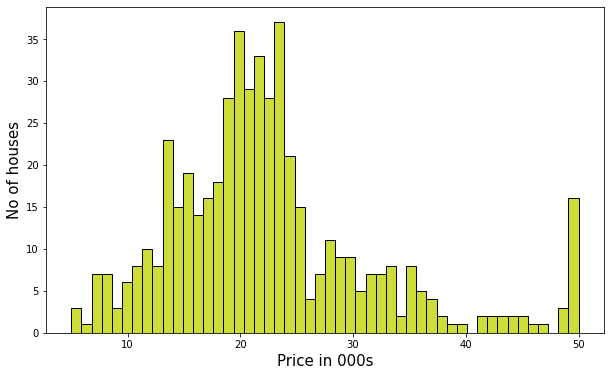

In [13]:
plt.figure(figsize=(10,6))
plt.hist(data['price'],bins=50,ec='black',color='#CDDC39')
plt.xlabel('Price in 000s',fontsize=15)
plt.ylabel('No of houses',fontsize=15)
plt.show()

C:\Users\Aashish\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


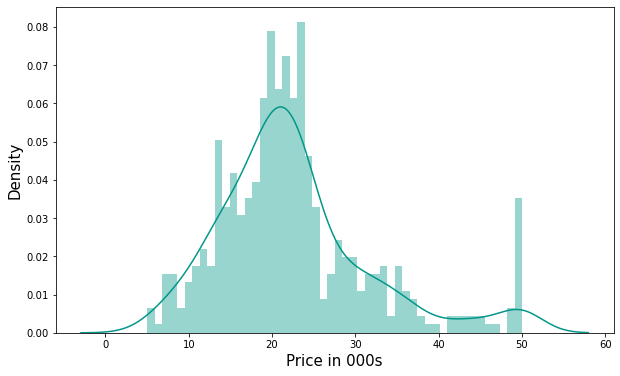

In [14]:
plt.figure(figsize=(10,6))
sns.distplot(data['price'],bins=50,color='#009688')
plt.xlabel('Price in 000s',fontsize=15)
plt.ylabel('Density',fontsize=15)

plt.show()

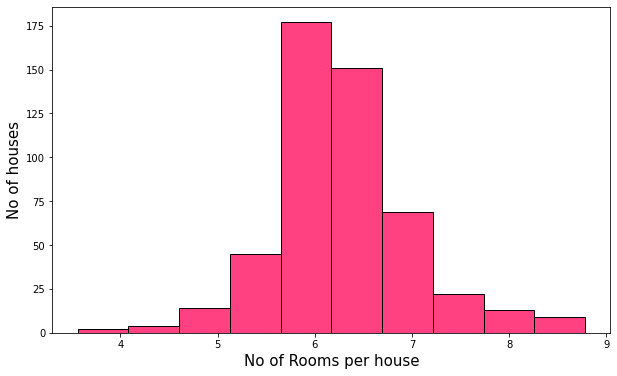

In [15]:
plt.figure(figsize=(10,6))
plt.hist(data['RM'],ec='black',color='#FF4081')
plt.xlabel('No of Rooms per house',fontsize=15)
plt.ylabel('No of houses',fontsize=15)
plt.show()

In [16]:
data['RM'].mean()

6.284634387351787

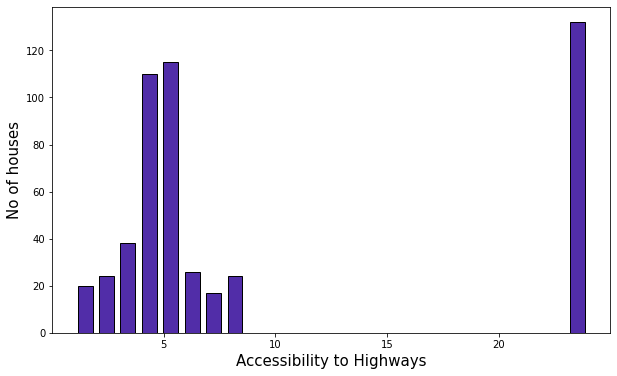

In [17]:
plt.figure(figsize=(10,6))
plt.hist(data['RAD'],bins=24,ec='black',color='#512DA8',histtype='bar',rwidth=0.7)
plt.xlabel('Accessibility to Highways',fontsize=15)
plt.ylabel('No of houses',fontsize=15)
plt.show()

In [18]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [19]:
frequency = data['RAD'].value_counts()

In [20]:
type(frequency)

pandas.core.series.Series

In [21]:
frequency.index

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 2.0, 8.0, 1.0, 7.0], dtype='float64')

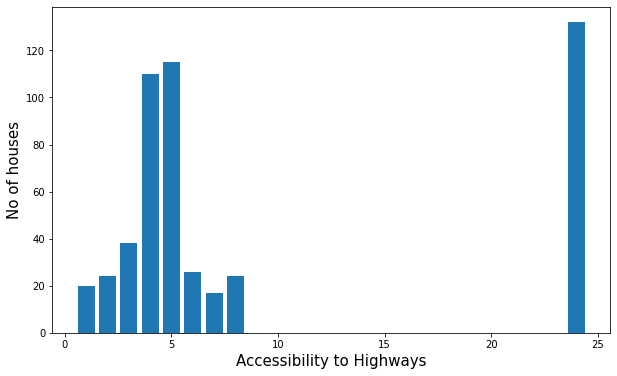

In [22]:
plt.figure(figsize=(10,6))
plt.bar(frequency.index,frequency)
plt.xlabel('Accessibility to Highways',fontsize=15)
plt.ylabel('No of houses',fontsize=15)
plt.show()

In [23]:
data.value_counts('CHAS')

CHAS
0.0    471
1.0     35
dtype: int64

In [24]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Correlation 
## $$ \rho_{xy} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{X,Y} \leq 1.0 $$

In [25]:
data['price'].corr(data['RM'])

0.6953599470715394

In [26]:
data['price'].corr(data['PTRATIO'])

-0.5077866855375621

In [27]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [28]:
mask = np.zeros_like(data.corr())
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [29]:
triangle_indices = np.triu_indices_from(mask)

In [30]:
triangle_indices

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  8,
         8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11,
        12, 12, 13], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  1,  2,  3,
         4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  2,  3,  4,  5,  6,  7,  8,
         9, 10, 11, 12, 13,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  4,
         5,  6,  7,  8,  9, 10, 11, 12, 13,  5,  6,  7,  8,  9, 10, 11, 12,
        13,  6,  7,  8,  9, 10, 11, 12, 13,  7,  8,  9, 10, 11, 12, 13,  8,
         9, 10, 11, 12, 13,  9, 10, 11, 12, 13, 10, 11, 12, 13, 11, 12, 13,
        12, 13, 13], dtype=int64))

In [31]:
mask[triangle_indices] = True

In [32]:
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

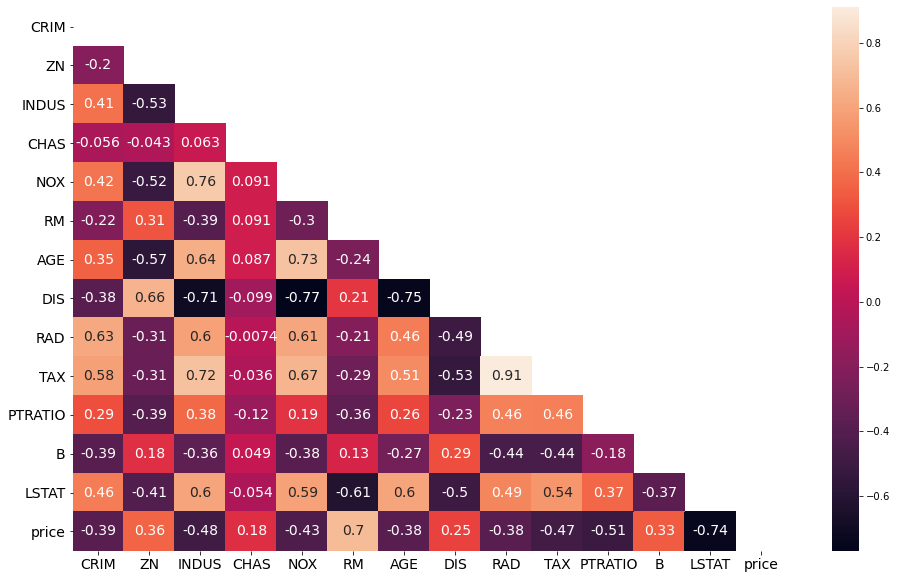

In [33]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),mask=mask,annot=True,annot_kws={"size":14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

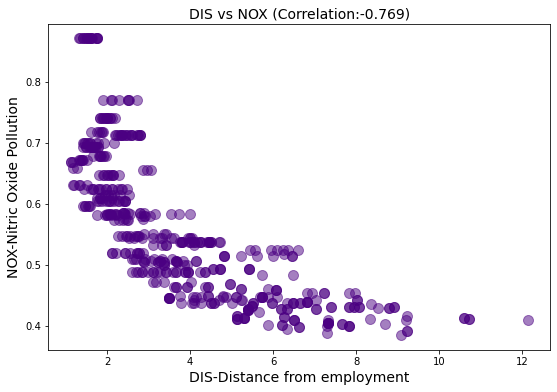

In [34]:
plt.figure(figsize=(9,6))
rel = round(data["DIS"].corr(data['NOX']),3)
plt.title(f'DIS vs NOX (Correlation:{rel})',fontsize=14)

plt.xlabel('DIS-Distance from employment',fontsize=14)
plt.ylabel('NOX-Nitric Oxide Pollution',fontsize=14)
plt.scatter(data['DIS'],data['NOX'],alpha=0.5,s=100,color='indigo')
plt.show()

<Figure size 864x576 with 0 Axes>

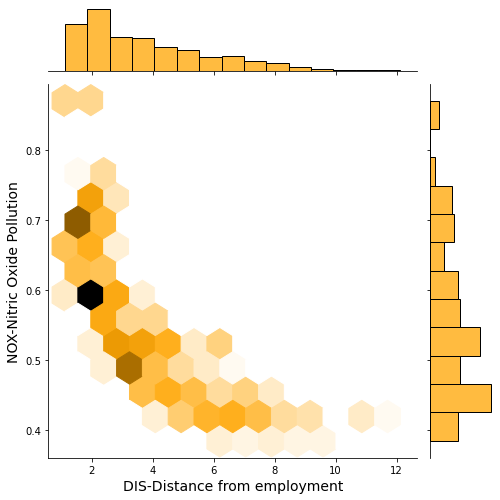

In [35]:
plt.figure(figsize=(12,8))
sns.jointplot(x=data['DIS'],y=data['NOX'],kind='hex',height=7,color='orange')
plt.xlabel('DIS-Distance from employment',fontsize=14)
plt.ylabel('NOX-Nitric Oxide Pollution',fontsize=14)
plt.show()

<Figure size 864x576 with 0 Axes>

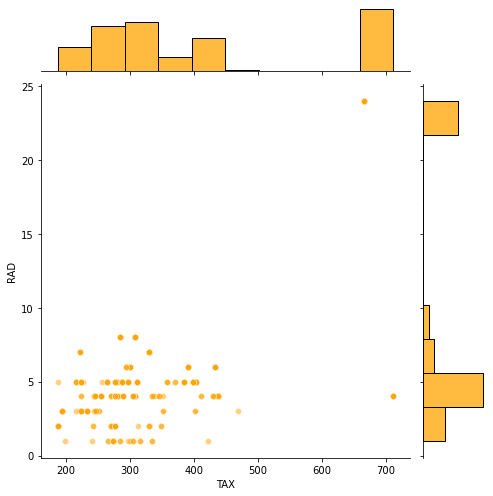

In [36]:
plt.figure(figsize=(12,8))
sns.jointplot(x=data['TAX'],y=data['RAD'],height=7,color='orange',joint_kws={'alpha':0.5})
plt.xlabel('DIS-Distance from employment',fontsize=14)
plt.ylabel('NOX-Nitric Oxide Pollution',fontsize=14)
plt.show()

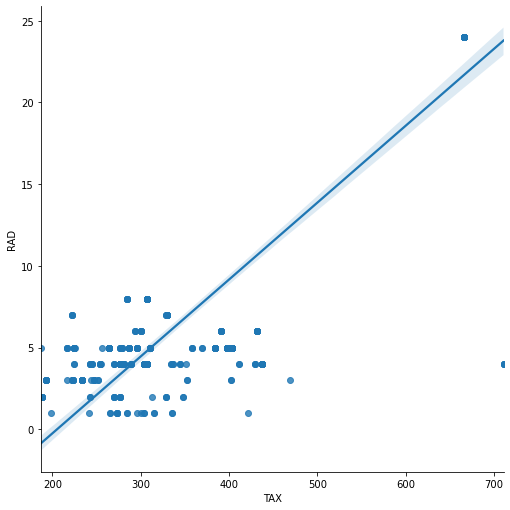

In [37]:
sns.lmplot(x='TAX',y='RAD',data=data,height=7)
plt.show()

<AxesSubplot:xlabel='RM', ylabel='price'>

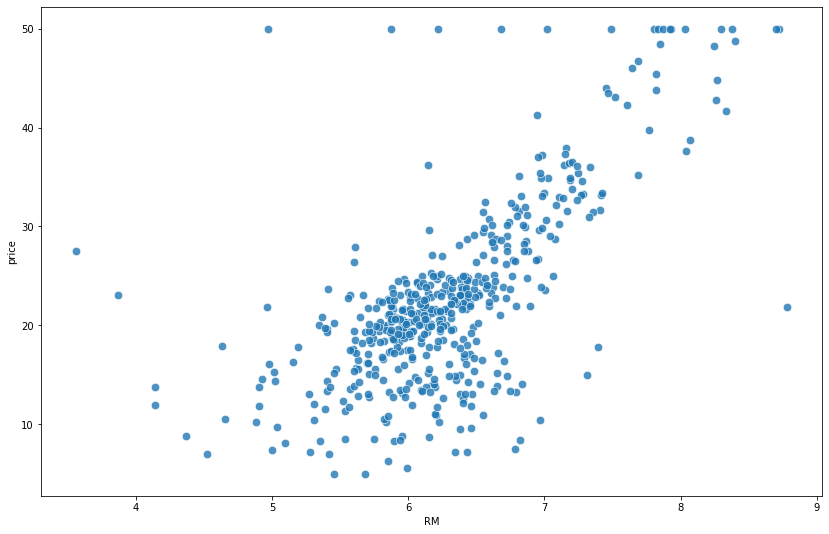

In [38]:
plt.figure(figsize=(14,9))

sns.scatterplot(x='RM',y='price',data=data,s=70,alpha=0.8)

In [39]:
prices = data['price']
features = data.drop('price',axis=1)

In [40]:
X_train,X_test,y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state=10)

In [41]:
regr = LinearRegression()

In [42]:
regr.fit(X_train,y_train)

LinearRegression()

In [43]:
print(regr.intercept_)

36.533051382824624


In [44]:
pd.DataFrame(data=regr.coef_,index=X_train.columns,columns=['coef']).sort_values(by='coef',ascending=False)

,coef
RM,3.108456
CHAS,1.974515
RAD,0.303988
ZN,0.063198
AGE,0.016292
B,0.011419
INDUS,-0.007576
TAX,-0.012082
CRIM,-0.128181
LSTAT,-0.581626


In [45]:
print(f'The r-squared value for training dataset:{regr.score(X_train,y_train)}')
print(f'The r-squared value for testing dataset:{regr.score(X_test,y_test)}')

The r-squared value for training dataset:0.750121534530608
The r-squared value for testing dataset:0.6709339839115631


## Data Transformation

In [46]:
data['price'].skew()

1.1080984082549072

In [47]:
y_log = np.log(data['price'])
y_log

0      3.178054
1      3.072693
2      3.546740
3      3.508556
4      3.589059
         ...   
501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: price, Length: 506, dtype: float64

In [48]:
y_log.skew()

-0.33032129530987864

C:\Users\Aashish\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


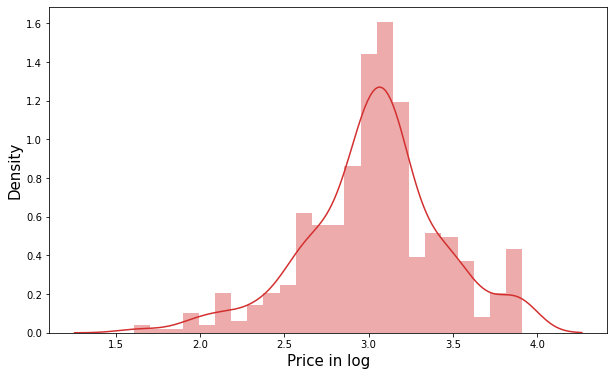

In [49]:
plt.figure(figsize=(10,6))
sns.distplot(y_log,color='#D32F2F')
plt.xlabel('Price in log',fontsize=15)
plt.ylabel('Density',fontsize=15)

plt.show()

In [50]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log



<AxesSubplot:xlabel='LSTAT', ylabel='LOG_PRICE'>

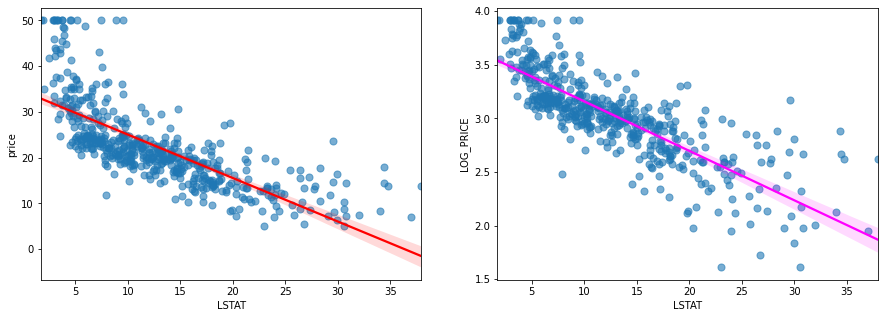

In [51]:

fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.regplot(x='LSTAT',y='price',data=data,scatter_kws={'alpha':0.6,'s':50},line_kws={'color':'red'},ax=axes[0])
  
        
sns.regplot(x='LSTAT',y='LOG_PRICE',data=transformed_data,scatter_kws={'alpha':0.6,'s':50},line_kws={'color':'#FF00FF'},ax=axes[1])


## Regression using log prices

In [52]:
prices = np.log(data['price'])
features = data.drop('price',axis=1)

X_train,X_test,y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state=10)

regr = LinearRegression()

regr.fit(X_train,y_train)

print(regr.intercept_)
print(f'The r-squared value for training dataset:{regr.score(X_train,y_train)}')
print(f'The r-squared value for testing dataset:{regr.score(X_test,y_test)}')

4.059943871775191
The r-squared value for training dataset:0.7930234826697583
The r-squared value for testing dataset:0.7446922306260717


In [53]:
pd.DataFrame(data=regr.coef_,index=X_train.columns,columns=['coef']).sort_values(by='coef',ascending=False)

,coef
CHAS,0.080331
RM,0.073404
RAD,0.014565
INDUS,0.002030
ZN,0.001579
AGE,0.000763
B,0.000516
TAX,-0.000645
CRIM,-0.010672
LSTAT,-0.031390


In [54]:
# Charles River Property Premium
np.e**0.080331
# Natural log and back to normal value using built-in numpy exp() function
np.exp(0.080331)

1.0836456950439142

In [55]:
np.log10(1000)

3.0

## p values and coefficient

In [56]:
X_incl_constant =sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_constant)

In [57]:
results = model.fit()

In [58]:
#results.params

In [59]:
pd.DataFrame({'coef':results.params,'pvalues':round(results.pvalues,3)})

,coef,pvalues
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


## Testing for Multicollinearity
$$ TAX = \alpha_0 + \alpha_1 RM + \alpha_2 NOX + .... \alpha_{12} LSTAT $$
$$ VIF_{TAX} = \frac{1}{(1-R_{TAX}^2)} $$

In [60]:
variance_inflation_factor(exog=X_incl_constant.values,exog_idx=1)

1.7145250443932485

In [61]:
X_incl_constant.values[0][0:]

array([1.0000e+00, 8.8730e-02, 2.1000e+01, 5.6400e+00, 0.0000e+00,
       4.3900e-01, 5.9630e+00, 4.5700e+01, 6.8147e+00, 4.0000e+00,
       2.4300e+02, 1.6800e+01, 3.9556e+02, 1.3450e+01])

In [62]:
l = [i for i in X_incl_constant.values[0][0:] ]

In [63]:
l

[1.0,
 0.08873,
 21.0,
 5.64,
 0.0,
 0.439,
 5.963,
 45.7,
 6.8147,
 4.0,
 243.0,
 16.8,
 395.56,
 13.45]

In [64]:
X_incl_constant

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
50,1.0,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
367,1.0,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
34,1.0,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34
78,1.0,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
172,1.0,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,1.0,0.16760,0.0,7.38,0.0,0.493,6.426,52.3,4.5404,5.0,287.0,19.6,396.90,7.20
15,1.0,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
484,1.0,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34
125,1.0,0.16902,0.0,25.65,0.0,0.581,5.986,88.4,1.9929,2.0,188.0,19.1,385.02,14.81


In [65]:
temp = []
for i in range(0,len(X_incl_constant.columns)):
                l=variance_inflation_factor(exog=X_incl_constant.values,exog_idx=i)
                temp.append(l)

temp


[597.5487126763895,
 1.7145250443932485,
 2.3328224265597597,
 3.943448822674638,
 1.0788133385000576,
 4.410320817897634,
 1.8404053075678564,
 3.3267660823099394,
 4.222923410477865,
 7.314299817005058,
 8.508856493040817,
 1.8399116326514058,
 1.338671325536472,
 2.812544292793035]

In [66]:
pd.DataFrame({'coef name':X_incl_constant.columns,'VIF':np.around(temp,2)})

,coef name,VIF
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


## Model Simplification 

In [67]:
X_incl_constant =sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_constant)

results = model.fit()

#results.params

pd.DataFrame({'coef':results.params,'pvalues':round(results.pvalues,3)})

,coef,pvalues
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


In [68]:
results.bic

-139.74997769478898

In [69]:
results.rsquared

0.7930234826697583

In [70]:
#Reduced model #excluding INDUS
X_incl_constant =sm.add_constant(X_train)
X_incl_constant = X_incl_constant.drop(['INDUS'],axis=1)
model = sm.OLS(y_train,X_incl_constant)

results = model.fit()

#results.params

pd.DataFrame({'coef':results.params,'pvalues':round(results.pvalues,3)})


print('The BIC is :',results.bic)

print('The rsquared value :', results.rsquared)

The BIC is : -145.14508855591163
The rsquared value : 0.7927126289415163


In [71]:
#Reduced model #excluding INDUS and AGE
X_incl_constant =sm.add_constant(X_train)
X_incl_constant = X_incl_constant.drop(['INDUS','AGE'],axis=1)
model = sm.OLS(y_train,X_incl_constant)

results = model.fit()

#results.params

pd.DataFrame({'coef':results.params,'pvalues':round(results.pvalues,3)})


print('The BIC is :',results.bic)

print('The rsquared value :', results.rsquared)

The BIC is : -149.49934294224678
The rsquared value : 0.7918657661852815


## Residual and Residual Plots

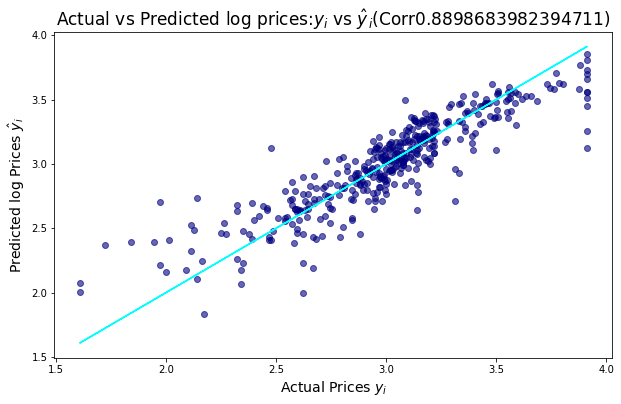

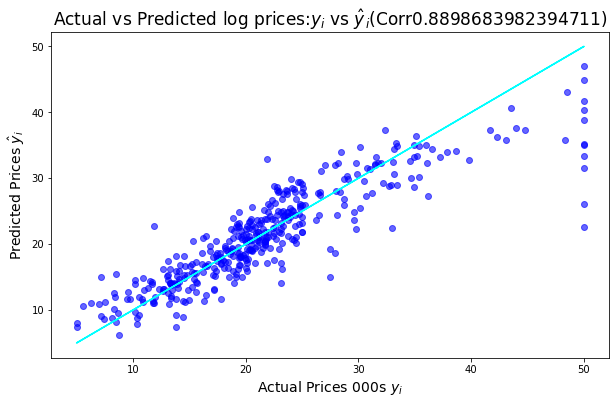

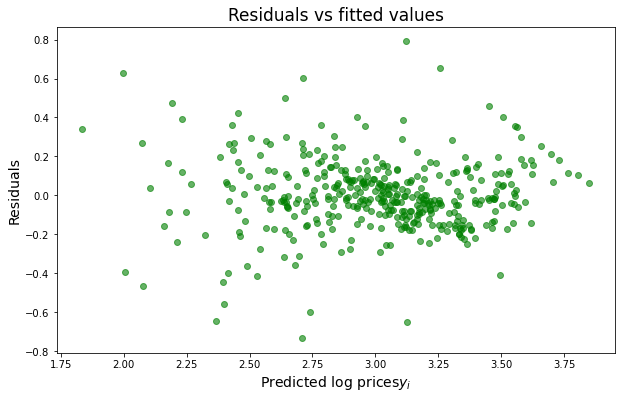

In [72]:
prices = np.log(data['price'])
features = data.drop(['price','INDUS','AGE'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state=10)
# Using statsmodel
X_incl_constant =sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_constant)
results = model.fit()
#Residuals
#residuals = y_train - results.fittedvalues
#results.resid
# Graph Actual vs Predicted
corr = y_train.corr(results.fittedvalues)
plt.figure(figsize=(10,6))
plt.scatter(x=y_train,y=results.fittedvalues,c='navy',alpha=0.6)
plt.xlabel('Actual Prices $y _i$',fontsize=14)
plt.ylabel('Predicted log Prices $\haty _i$',fontsize=14)
plt.title(f'Actual vs Predicted log prices:$y _i$ vs $\hat y_i$(Corr{corr})',fontsize=17)
plt.plot(y_train,y_train,color='cyan')
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(x=np.e**y_train,y=np.e**results.fittedvalues,c='blue',alpha=0.6)
plt.xlabel('Actual Prices 000s $y _i$',fontsize=14)
plt.ylabel('Predicted Prices $\haty _i$',fontsize=14)
plt.plot(np.e**y_train,np.e**y_train,color='cyan')
plt.title(f'Actual vs Predicted log prices:$y _i$ vs $\hat y_i$(Corr{corr})',fontsize=17)
plt.show()

#Residual vs Predicted values
plt.figure(figsize=(10,6))
plt.scatter(x=results.fittedvalues,y=results.resid,c='green',alpha=0.6)
plt.xlabel('Predicted log prices$y _i$',fontsize=14)
plt.ylabel('Residuals',fontsize=14)
plt.title('Residuals vs fitted values',fontsize=17)
plt.show()

#Mean Squared Error
reduced_log_mse = round(results.mse_resid,3)
reduced_log_rsquared = round(results.rsquared,3)

<Figure size 1080x1080 with 0 Axes>

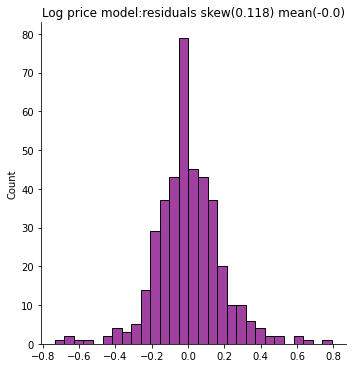

In [73]:
#Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(),3)
skew = round(results.resid.skew(),3)
plt.figure(figsize=(15,15))
sns.displot(results.resid,color='purple',kind='hist')
plt.title(f'Log price model:residuals skew({skew}) mean({resid_mean})')
plt.show()

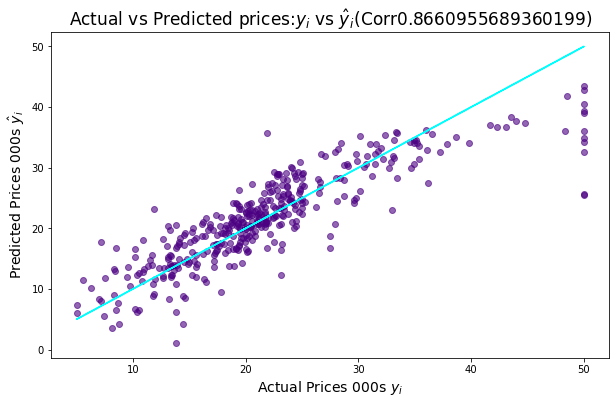

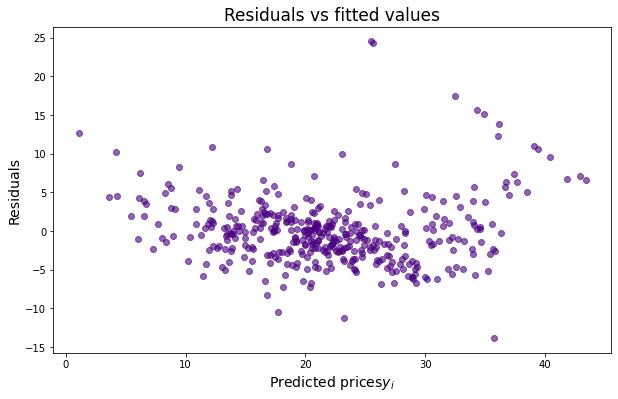

<Figure size 1080x1080 with 0 Axes>

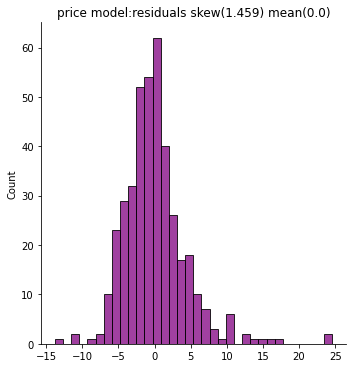

In [74]:
prices = data['price']
features = data.drop(['price'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state=10)

X_incl_constant =sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_constant)
results = model.fit()


corr = y_train.corr(results.fittedvalues)
plt.figure(figsize=(10,6))
plt.scatter(x=y_train,y=results.fittedvalues,c='indigo',alpha=0.6)
plt.xlabel('Actual Prices 000s $y _i$',fontsize=14)
plt.ylabel('Predicted Prices 000s $\haty _i$',fontsize=14)
plt.title(f'Actual vs Predicted prices:$y _i$ vs $\hat y_i$(Corr{corr})',fontsize=17)
plt.plot(y_train,y_train,color='cyan')
plt.show()


#Residual vs Predicted values
plt.figure(figsize=(10,6))
plt.scatter(x=results.fittedvalues,y=results.resid,c='indigo',alpha=0.6)
plt.xlabel('Predicted prices$y _i$',fontsize=14)
plt.ylabel('Residuals',fontsize=14)
plt.title('Residuals vs fitted values',fontsize=17)
plt.show()

#Residual Distribution
resid_mean = round(results.resid.mean(),3)
skew = round(results.resid.skew(),3)
plt.figure(figsize=(15,15))
sns.displot(results.resid,color='purple',kind='hist')
plt.title(f'price model:residuals skew({skew}) mean({resid_mean})')
plt.show()

full_normal_mse = round(results.mse_resid,3)
full_normal_rsquared = round(results.rsquared,3)

## Model Prediction

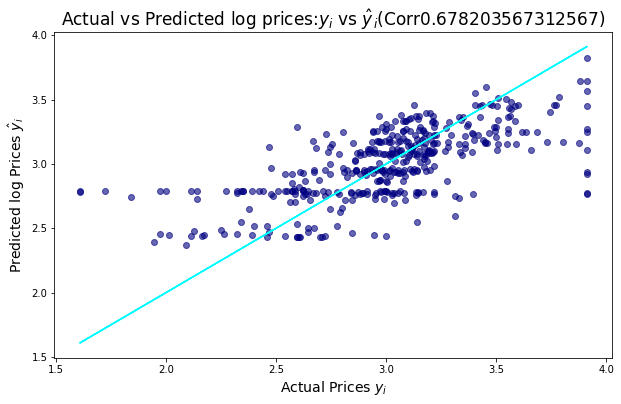

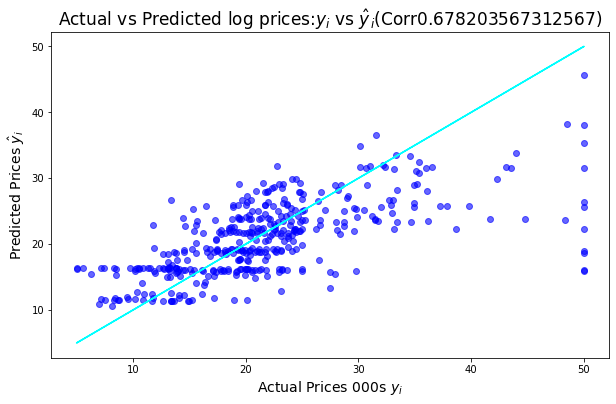

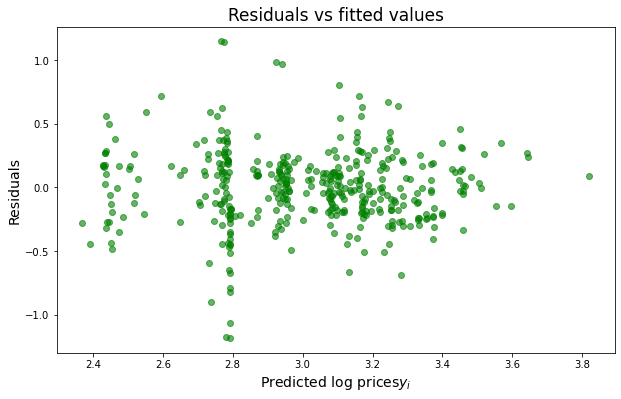

In [75]:
prices = np.log(data['price'])
features = data.drop(['price','INDUS','AGE','LSTAT','NOX','RM','CRIM'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state=10)
# Using statsmodel
X_incl_constant =sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_constant)
results = model.fit()
#Residuals
#residuals = y_train - results.fittedvalues
#results.resid
# Graph Actual vs Predicted
corr = y_train.corr(results.fittedvalues)
plt.figure(figsize=(10,6))
plt.scatter(x=y_train,y=results.fittedvalues,c='navy',alpha=0.6)
plt.xlabel('Actual Prices $y _i$',fontsize=14)
plt.ylabel('Predicted log Prices $\haty _i$',fontsize=14)
plt.title(f'Actual vs Predicted log prices:$y _i$ vs $\hat y_i$(Corr{corr})',fontsize=17)
plt.plot(y_train,y_train,color='cyan')
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(x=np.e**y_train,y=np.e**results.fittedvalues,c='blue',alpha=0.6)
plt.xlabel('Actual Prices 000s $y _i$',fontsize=14)
plt.ylabel('Predicted Prices $\haty _i$',fontsize=14)
plt.plot(np.e**y_train,np.e**y_train,color='cyan')
plt.title(f'Actual vs Predicted log prices:$y _i$ vs $\hat y_i$(Corr{corr})',fontsize=17)
plt.show()

#Residual vs Predicted values
plt.figure(figsize=(10,6))
plt.scatter(x=results.fittedvalues,y=results.resid,c='green',alpha=0.6)
plt.xlabel('Predicted log prices$y _i$',fontsize=14)
plt.ylabel('Residuals',fontsize=14)
plt.title('Residuals vs fitted values',fontsize=17)
plt.show()

#Mean Squared Error
omitted_var_mse = round(results.mse_resid,3)
omitted_var_rsquared = round(results.rsquared,3)

In [76]:
pd.DataFrame({'R-squared':[reduced_log_rsquared,full_normal_rsquared,omitted_var_rsquared],
              'MSE':[reduced_log_mse,full_normal_mse,omitted_var_mse]},index=['Reduced log Model','Full normal price Model','omitted var model'])

,R-squared,MSE
Reduced log Model,0.792,0.035
Full normal price Model,0.750,19.921
omitted var model,0.460,0.090
